### Imports

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

### Dataset

In [3]:

customers=pd.read_csv('/content/drive/MyDrive/zeotap assignment/Customers.csv')
transactions=pd.read_csv('/content/drive/MyDrive/zeotap assignment/Transactions.csv')

In [4]:
customers = data = transactions.merge(customers, on='CustomerID')

In [5]:
customers

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15
...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11


In [7]:
customer_features = customers.groupby('CustomerID').agg({
    'Region': 'first',
    'SignupDate': 'first',
    'Quantity': 'sum',
    'TotalValue': 'sum',
    'ProductID': 'nunique'
}).reset_index()
customer_features

,CustomerID,Region,SignupDate,Quantity,TotalValue,ProductID
0,C0001,South America,2022-07-10,12,3354.52,5
1,C0002,Asia,2022-02-13,10,1862.74,4
2,C0003,South America,2024-03-07,14,2725.38,4
3,C0004,South America,2022-10-09,23,5354.88,8
4,C0005,Asia,2022-08-15,7,2034.24,3
...,...,...,...,...,...,...
194,C0196,Europe,2022-06-07,12,4982.88,3
195,C0197,Europe,2023-03-21,9,1928.65,3
196,C0198,Europe,2022-02-27,3,931.83,2
197,C0199,Europe,2022-12-03,9,1979.28,4


In [9]:
customer_features['SignupDate'] = pd.to_datetime(customer_features['SignupDate'], format='%Y-%m-%d')
customer_features['NumYears'] = (pd.Timestamp.now() - customer_features['SignupDate']).dt.days / 365
customer_features.drop('SignupDate', axis=1, inplace=True)


In [10]:
customer_features

,CustomerID,Region,Quantity,TotalValue,ProductID,NumYears
0,C0001,South America,12,3354.52,5,2.553425
1,C0002,Asia,10,1862.74,4,2.956164
2,C0003,South America,14,2725.38,4,0.893151
3,C0004,South America,23,5354.88,8,2.304110
4,C0005,Asia,7,2034.24,3,2.454795
...,...,...,...,...,...,...
194,C0196,Europe,12,4982.88,3,2.643836
195,C0197,Europe,9,1928.65,3,1.857534
196,C0198,Europe,3,931.83,2,2.917808
197,C0199,Europe,9,1979.28,4,2.153425


In [11]:
encoder = LabelEncoder()
customer_features['Region'] = encoder.fit_transform(customer_features['Region'])

In [14]:
scaler = StandardScaler()
normalized_features = scaler.fit_transform(customer_features.iloc[:, 2:])

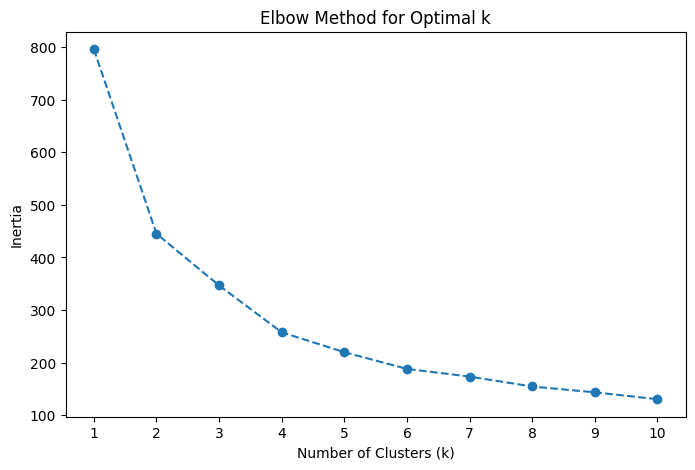

In [15]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()

Based on the Elbow Method \
K = 4 is the optimal for clustering

In [29]:
for num_clusters in range(2,11):
  kmeans = KMeans(n_clusters=num_clusters, random_state=42)
  customer_features['Cluster'] = kmeans.fit_predict(normalized_features)

  # Evaluate clustering metrics
  db_index = davies_bouldin_score(normalized_features, customer_features['Cluster'])
  silhouette_avg = silhouette_score(normalized_features, customer_features['Cluster'])
  print("\nNumber of Cluster = ",num_clusters,"")
  print(f'Davies-Bouldin Index: {db_index}')
  print(f'Silhouette Score: {silhouette_avg}')


Number of Cluster =  2 
Davies-Bouldin Index: 1.0410728842301356
Silhouette Score: 0.36946306370741583

Number of Cluster =  3 
Davies-Bouldin Index: 1.1327211055931978
Silhouette Score: 0.29183400361964584

Number of Cluster =  4 
Davies-Bouldin Index: 0.9456370948215491
Silhouette Score: 0.32722423482735064

Number of Cluster =  5 
Davies-Bouldin Index: 1.0199421412298986
Silhouette Score: 0.30755415059626096

Number of Cluster =  6 
Davies-Bouldin Index: 0.9958871247335783
Silhouette Score: 0.3132671736290838

Number of Cluster =  7 
Davies-Bouldin Index: 1.0216858078008009
Silhouette Score: 0.2895206068595068

Number of Cluster =  8 
Davies-Bouldin Index: 1.0509059336563675
Silhouette Score: 0.27635764571504573

Number of Cluster =  9 
Davies-Bouldin Index: 1.0789336475690279
Silhouette Score: 0.2643062047365266

Number of Cluster =  10 
Davies-Bouldin Index: 1.0851308360954555
Silhouette Score: 0.2702689854403472


In [23]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(normalized_features)

In [25]:
customer_features['Cluster'] = clusters


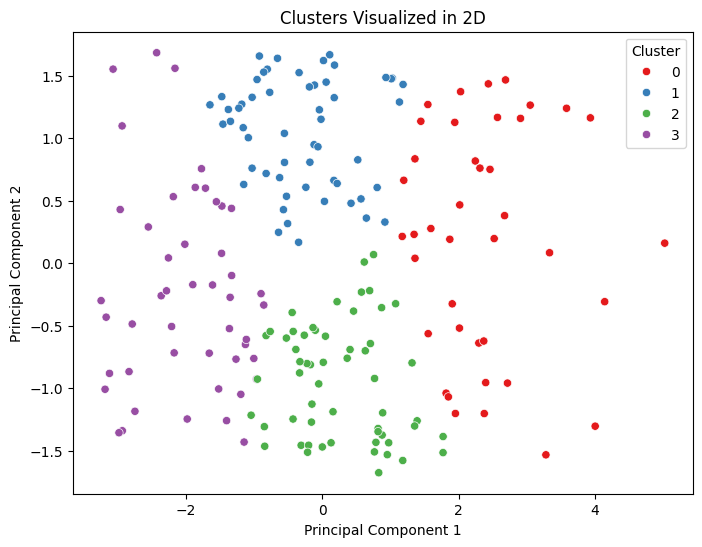

In [26]:
from sklearn.decomposition import PCA

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(normalized_features)

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=reduced_features[:, 0],
    y=reduced_features[:, 1],
    hue=customer_features['Cluster'],
    palette='Set1'
)
plt.title('Clusters Visualized in 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [27]:
cluster_metrics = customer_features.groupby('Cluster').agg({
    'TotalValue': ['mean', 'sum'],
    'Quantity': 'mean',
    'NumYears': 'mean'
}).reset_index()


In [28]:
cluster_metrics

Cluster   TotalValue              Quantity  NumYears
                  mean        sum       mean      mean
0       0  6075.926500  243037.06  21.550000  1.811027
1       1  3053.885455  167963.70  11.345455  2.442790
2       2  3658.754386  208549.00  13.754386  0.697332
3       3  1498.846809   70445.80   5.680851  1.228855